# Figure 2

In [1]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats

def f_test(x, y):
    '''
    TAKEN FROM https://www.statology.org/f-test-python/
    This function only works when the first sample variance is larger than the second sample variance. 
    Thus, define the two samples in such a way that they work with the function.
    '''
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

data_monkeys=np.loadtxt('Monkeys_with_trials.txt');
data_mice=np.loadtxt('Mice_with_trials.txt');


# structure of data set is:
# unit number, contrast, laser, rate, other stuff

DATA=[data_mice,data_monkeys]
species=['Mice','Monkeys']
color=['c','m']
bin_edges=np.arange(-300,300,0.1) 
bin_means=(bin_edges[1::]+bin_edges[0:-1])/2   


area=4.0;linethicknes=1.0;
font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42

N_stat=10**3;

def phi(x):
    return (0.5*(x+np.abs(x)))


Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
for idx_species in [0,1]:
    data=DATA[idx_species]
    Con=np.unique(data[:,1])
    print(Con)

[ 0.  8. 13. 21. 34. 55. 90.]
[ 0.  6. 12. 25. 50. 99.]


<ipython-input-10-120978215d63>:103: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[idx_species+cols*idx_row].set_xscale('symlog', linthreshx=12)
<ipython-input-10-120978215d63>:103: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[idx_species+cols*idx_row].set_xscale('symlog', linthreshx=12)
<ipython-input-10-120978215d63>:103: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  axs[idx_species+cols*idx_row].set_xscale('symlog', linthreshx=12)
<ipython-input-10-120978215d63>:103: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been r

[[ 1.         -0.06043495]
 [-0.06043495  1.        ]]
4.164225076093314 0.4748267945924203 8.870496559784941


"\npic_name='Figure_2.pdf'\nfig.savefig(pic_name,format='pdf',bbox_inches='tight')\npic_name='Figure_2.png'\nfig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)\n"

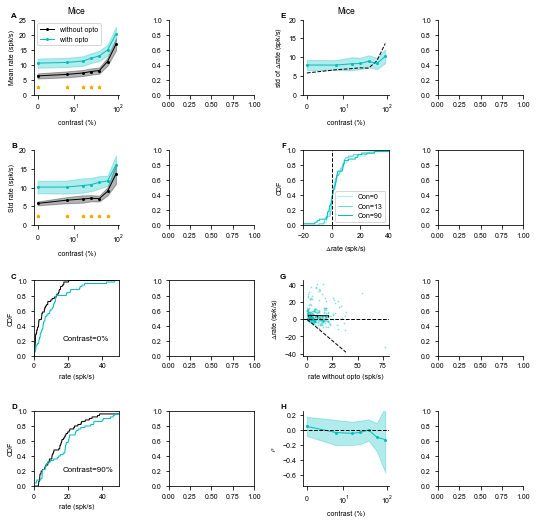

In [10]:
rows=4
cols=4
fig, axs = plt.subplots(rows,cols, figsize=(1.875*cols,1.5*rows), 
                        facecolor='w', edgecolor='k')#,sharex='col')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()


axs[0].text(-.2, 1.1,'A', transform=axs[0].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[4].text(-.2, 1.1,'B', transform=axs[4].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[8].text(-.2, 1.1,'C', transform=axs[8].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[12].text(-.2, 1.1,'D', transform=axs[12].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[0+2].text(-.2, 1.1,'E', transform=axs[0+2].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[4+2].text(-.2, 1.1,'F', transform=axs[4+2].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[8+2].text(-.2, 1.1,'G', transform=axs[8+2].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');
axs[12+2].text(-.2, 1.1,'H', transform=axs[12+2].transAxes,fontsize=8, fontweight='bold', va='top', ha='right');


for idx in [0,1,2,3,4,5,10,11,14,15]:
    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)
    
    

idx_laser=-1
for idx_species in [0]:#[0,1]:
    data=DATA[idx_species]
    Con=np.unique(data[:,1])
    Las=np.unique(data[:,2])
    cells_id=np.unique(data[:,0]);

    Las=[Las[0],Las[-1]]
    Cell_Resp=np.zeros((len(cells_id),len(Con),len(Las),))
    for idx_cell in range(len(cells_id)):
        for idx_con in range(len(Con)):
            for idx_las in range(len(Las)):
                mask=(data[:,0]==cells_id[idx_cell])&(data[:,2]==Las[idx_las])&(data[:,1]==Con[idx_con])
                Trial_Resp=data[mask,3::]
                Cell_Resp[idx_cell,idx_con,idx_las]=np.mean(Trial_Resp[np.isnan(Trial_Resp)==False])

    Bootstrap_idx=np.random.choice(np.arange(len(cells_id)),size=(len(cells_id),N_stat), replace=True)
    Bootstrap_Resp=np.zeros((N_stat,len(cells_id),len(Con),len(Las)))
    for idx_rep in range(N_stat):
        for idx_con in range(len(Con)):
            for idx_las in range(len(Las)):
                Bootstrap_Resp[idx_rep,:,idx_con,idx_las]= Cell_Resp[[Bootstrap_idx[:,idx_rep]],idx_con,idx_las]


    # Panels B: network response moments
    if idx_species==0:
        ymax=[25,25,20,20]
        title='Mice'# \n Population statistics'
        ystar=2.5;

    if idx_species==1:
        ymax=[80,80,60,60]
        title='Monkeys'# \n Population statistics'
        ystar=10;
        


    tests=np.zeros((len(Con),2));# Welch's t-test, and F-tesr
    cov=np.zeros(len(Con))    
    for idx_con in range(len(Con)):
        Base=Cell_Resp[:,idx_con,0]
        Resp=Cell_Resp[:,idx_con,-1]
        tests[idx_con,0]=(stats.ttest_ind(Base,Resp, equal_var=False))[1]
        tests[idx_con,1]=f_test(Resp,Base)[1]
        
    Moments_all=[]
    for idx_cases in range(6):
        if (idx_cases==0)|(idx_cases==1):
            # mean  rates
            idx_las=idx_cases;
            Measurements=np.mean(Bootstrap_Resp[:,:,:,idx_las],axis=1)
        if (idx_cases==2)|(idx_cases==3):
            # std  rates
            idx_las=idx_cases-2;
            Measurements=np.std(Bootstrap_Resp[:,:,:,idx_las],axis=1)
        if (idx_cases==4):
            # mean Delta rates
            color_to_use=color[idx_species]
            Delta=Bootstrap_Resp[:,:,:,-1]-Bootstrap_Resp[:,:,:,0]
            Measurements=np.std(Delta,axis=1)
        if (idx_cases==5):
            # rho rates Delta rates
            Base=Bootstrap_Resp[:,:,:,0]
            Delta=Bootstrap_Resp[:,:,:,-1]-Bootstrap_Resp[:,:,:,0]
            Measurements=np.zeros((N_stat,len(Con)))
            for idx_rep in range(N_stat):
                for idx_con in range(len(Con)): 
                    pippo=np.cov(Base[idx_rep,:,idx_con],Delta[idx_rep,:,idx_con])
                    Measurements[idx_rep,idx_con]=pippo[0,1]/pippo[1,1]
        Moments=np.zeros((len(Con),2))
        for idx_con in range(len(Con)): 
            Moments[idx_con,:]=np.mean(Measurements[:,idx_con]),np.std(Measurements[:,idx_con])
        Moments_all=Moments_all+[Moments]
        
    for idx in range(4):
        color_to_use=['k',color[idx_species],'k',color[idx_species]][idx]
        label=['without opto','with opto','without opto','with opto'][idx]
        idx_row=[0,0,1,1][idx]
        axs[idx_species+cols*idx_row].set_xscale('symlog', linthreshx=12)
        axs[idx_species+cols*idx_row].axis([-1.,110,0,ymax[idx]])
        axs[idx_species+cols*idx_row].set_xlabel('contrast (%)')
    
        m,sem=Moments_all[idx][:,0],Moments_all[idx][:,1]
        axs[idx_species+cols*idx_row].plot(Con,m,c=color_to_use,lw=linethicknes, marker='o', markersize=2,label=label,)
        axs[idx_species+cols*idx_row].fill_between(Con,m-sem,m+sem,color=color_to_use,alpha=0.3)

    

    for idx in range(2):
        for idx_con in range(len(Con)):
            if (tests[idx_con,idx]<0.05):
                axs[idx_species+cols*idx].scatter(Con[idx_con],ystar, c='orange',marker='*',s=10)
    
    idx=2
    m,sem=Moments_all[idx][:,0],Moments_all[idx][:,1]
    axs[2+idx_species].plot(Con,m,c='k',
                            lw=linethicknes, marker=' ', markersize=2,alpha=1.,
                            ls='--')
    axs[idx_species+cols*0].legend(loc='best')
    axs[idx_species].set_title(title)
    axs[idx_species].set_ylabel('Mean rate (spk/s)')
    axs[idx_species+cols].set_ylabel('Std rate (spk/s)')
    

    if idx_species==0:
        xmax=50
        

    if idx_species==1:
        xmax=250

    alpha=[0.5,1]
    count=0
    for idx_con in [0,len(Con)-1]:
        hist=np.histogram(Cell_Resp[:,idx_con,0],bin_edges,density=True)
        axs[idx_species+(2+count)*cols].plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c='k')#,label='Con=%d'%Con[idx_con])
        hist=np.histogram(Cell_Resp[:,idx_con,-1],bin_edges,density=True)
        axs[idx_species+(2+count)*cols].plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c=color[idx_species])
        axs[idx_species+(2+count)*cols].axis([0,xmax,0,1])
        #axs[idx_species+(2+count)*cols].legend(prop={'size': 6},loc='lower right')        
        axs[idx_species+(2+count)*cols].set_xlabel(r'rate (spk/s)')
        axs[idx_species+(2+count)*cols].set_ylabel('CDF')
        axs[idx_species+(2+count)*cols].text(xmax/3,0.2,'Contrast=%d%%'%Con[idx_con], fontsize=8)

        count=count+1

    
        
    # Distribution of responses
    if idx_species==0:
        xmin,xmax=-20,40
        title='Mice'
    if idx_species==1:
        xmin,xmax=-100,200
        title='Monkeys'
    if idx_species==0:
        axs[2+idx_species].axis([-1.,110,0.,20])
    if idx_species==1:
        axs[2+idx_species].axis([-1.,110,0.,60])
        axs[2+idx_species].axhline(y=0,ls='--',c='k')
    idx=4
    m,sem=Moments_all[idx][:,0],Moments_all[idx][:,1]
    axs[2+idx_species].plot(Con,m,c=color[idx_species],lw=linethicknes, marker='o', markersize=2,label=label,)
    axs[2+idx_species].fill_between(Con,m-sem,m+sem,color=color[idx_species],alpha=0.3)

    axs[2+idx_species].set_xscale('symlog', linthreshx=12)
    axs[2+idx_species].set_ylabel(r'std of $\Delta$rate (spk/s)')
    axs[2+idx_species].set_xlabel('contrast (%)')
          
    
    alpha=[0.3,0.6,1.0]
    count=0
    for idx_con in [0,2,-1]:
        Delta=Cell_Resp[:,idx_con,-1]-Cell_Resp[:,idx_con,0]
        hist=np.histogram(Delta,bin_edges,density=True)
        axs[cols+2+idx_species].plot(bin_means,np.cumsum(hist[0])*np.diff(bin_edges),c=color[idx_species],alpha=alpha[count],label='Con=%d'%Con[idx_con])
        count=count+1
    axs[cols+2+idx_species].legend(loc='lower right')   #prop={'size': 6},     
    axs[cols+2+idx_species].axis([xmin,xmax,0,1])
    axs[cols+2+idx_species].set_xlabel(r'$\Delta$rate (spk/s)')
    axs[cols+2+idx_species].set_ylabel('CDF')
    axs[2+idx_species].set_title(title)
    axs[cols+2+idx_species].axvline(x=0,c='k',ls='--')
        
    
    Base=Cell_Resp[:,:,0].ravel()
    Delta=(Cell_Resp[:,:,-1]-Cell_Resp[:,:,0]).ravel()
         
    print(np.corrcoef(Base,Delta))
    axs[2*cols+2+idx_species].scatter(Base,Delta,marker='o',c=color[idx_species],
                               s=1,label=species[idx_species],alpha=0.3)
    print(np.mean(Delta),stats.sem(Delta), np.std(Delta))
    #axs[2+idx_species].axis([-1.,110,-0.5,.1])
    axs[2*cols+2+idx_species].axhline(y=0,ls='--',c='k')
    axs[2*cols+2+idx_species].set_ylabel('$\Delta$rate (spk/s)')
    axs[2*cols+2+idx_species].set_xlabel('rate without opto (spk/s)')
    npercentiles=4
    hist=np.histogram(Base,bin_edges,density=True)
    Base_CDF=np.cumsum(hist[0])*np.diff(bin_edges)

    base_pc=np.zeros(npercentiles)
    delta_pc=np.zeros((npercentiles,2))    
    tests=np.zeros(npercentiles);# Welch's t-test, and F-tesr
    for idx_pc in range(npercentiles):
        lower_bound=bin_means[np.argmin(np.abs(Base_CDF-1./npercentiles*idx_pc))]
        upper_bound=bin_means[np.argmin(np.abs(Base_CDF-1./npercentiles*(idx_pc+1)))]
        mask_base=(Base>=lower_bound)&(Base<upper_bound);
        base_pc[idx_pc]=np.mean(Base[mask_base])
        delta_pc[idx_pc,0]=np.mean(Delta[mask_base])
        delta_pc[idx_pc,1]=stats.sem(Delta[mask_base])
        tests[idx_pc]=(stats.ttest_1samp(Delta[mask_base],0))[1]

    axs[2*cols+2+idx_species].errorbar(base_pc,delta_pc[:,0],delta_pc[:,1],
                                color='k',#color[idx_species],
                                label=species[idx_species])
    
    xxx=np.linspace(0,np.max(Base)/2,10)
    axs[2*cols+2+idx_species].plot(xxx,-xxx,ls='--',c='k')
    
    idx=5
    m,sem=Moments_all[idx][:,0],Moments_all[idx][:,1]
    axs[3*cols+2+idx_species].plot(Con,m,c=color[idx_species],lw=linethicknes, marker='o', markersize=2,label=label,)
    axs[3*cols+2+idx_species].fill_between(Con,m-sem,m+sem,color=color[idx_species],alpha=0.3)

    axs[3*cols+2+idx_species].set_xscale('symlog', linthreshx=12)
    axs[3*cols+2+idx_species].axis([-1.,110,-0.75,.25])
    axs[3*cols+2+idx_species].axhline(y=0,ls='--',c='k')
    axs[3*cols+2+idx_species].set_ylabel(r'$\rho$')
    axs[3*cols+2+idx_species].set_xlabel('contrast (%)')
    
plt.tight_layout()
fig.set_size_inches(1.875*cols,1.875*rows)
'''
pic_name='Figure_2.pdf'
fig.savefig(pic_name,format='pdf',bbox_inches='tight')
pic_name='Figure_2.png'
fig.savefig(pic_name,format='png',bbox_inches='tight', dpi=300)
'''



## 